# Introdução

In [1]:
import yfinance as yf
import pandas as pd

import pandas as pd 
import numpy as np 
import math
import matplotlib. pyplot as plt 
import seaborn as sns 
from scipy import stats


In [2]:
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_columns', None)

In [3]:
tickers = ['WEGE3.SA','AURE3.SA','LEVE3.sa','CSMG3.SA'
           ,'PETR4.SA','PETR3.SA','MTRE3.SA','BRAP4.SA','BRAP3.SA'
           ,'GOAU4.SA','AGRO3.SA','SLCE3.SA'
           ,'VALE3.SA','CPFE3.SA','SBSP3.SA'
           ,'ITUB3.SA','ITUB4.SA','BMGB4.SA']

stocks = yf.download(tickers,period='2y', interval='1d')

df = pd.DataFrame(stocks['Adj Close']).reset_index()

df.set_index('Date')

#df.rename(columns={'AMER3.SA':'AMERICANAS','MGLU3.SA':'MAGALU'}, inplace=True)

#df.columns.droplevel(1)

df.tail()

[*********************100%%**********************]  18 of 18 completed


Ticker,Date,AGRO3.SA,AURE3.SA,BMGB4.SA,BRAP3.SA,BRAP4.SA,CPFE3.SA,CSMG3.SA,GOAU4.SA,ITUB3.SA,ITUB4.SA,LEVE3.SA,MTRE3.SA,PETR3.SA,PETR4.SA,SBSP3.SA,SLCE3.SA,VALE3.SA,WEGE3.SA
495,2024-07-18,27.79,12.42,3.57,18.19,18.92,33.32,20.34,10.99,29.10,34.00,33.28,3.97,41.60,38.53,82.02,19.31,61.17,47.40
496,2024-07-19,27.87,12.35,3.65,18.29,18.93,32.88,20.32,11.06,29.36,34.26,33.29,4.02,41.71,38.69,84.90,19.35,61.12,47.29
497,2024-07-22,27.33,12.47,3.64,18.25,18.90,33.25,21.30,11.13,29.34,34.24,33.39,4.08,41.07,37.92,87.00,19.00,61.05,47.17
498,2024-07-23,26.95,12.30,3.55,17.95,18.64,32.80,22.08,10.57,29.24,34.19,33.05,3.96,40.49,37.43,88.64,18.70,60.23,47.05
499,2024-07-24,26.84,12.16,3.46,18.01,18.50,32.98,21.74,10.47,29.30,34.14,32.85,3.97,40.90,37.73,89.20,18.45,60.60,46.65


In [4]:

dataset = df.copy()
dataset.drop(labels=['Date'], axis=1, inplace=True)
taxas_retorno = (dataset/dataset.shift(1))-1
taxas_retorno.std()*100

Ticker
AGRO3.SA   1.83
AURE3.SA   1.28
BMGB4.SA   2.44
BRAP3.SA   1.72
BRAP4.SA   1.70
CPFE3.SA   1.49
CSMG3.SA   2.12
GOAU4.SA   1.76
ITUB3.SA   1.27
ITUB4.SA   1.45
LEVE3.SA   2.40
MTRE3.SA   3.45
PETR3.SA   2.25
PETR4.SA   2.21
SBSP3.SA   1.96
SLCE3.SA   1.69
VALE3.SA   1.79
WEGE3.SA   1.67
dtype: float64

In [5]:
taxas_retorno.std()*252


Ticker
AGRO3.SA   4.62
AURE3.SA   3.21
BMGB4.SA   6.14
BRAP3.SA   4.32
BRAP4.SA   4.29
CPFE3.SA   3.75
CSMG3.SA   5.35
GOAU4.SA   4.44
ITUB3.SA   3.19
ITUB4.SA   3.65
LEVE3.SA   6.04
MTRE3.SA   8.69
PETR3.SA   5.67
PETR4.SA   5.58
SBSP3.SA   4.94
SLCE3.SA   4.25
VALE3.SA   4.51
WEGE3.SA   4.21
dtype: float64

In [6]:
taxas_retorno.cov()

Ticker,AGRO3.SA,AURE3.SA,BMGB4.SA,BRAP3.SA,BRAP4.SA,CPFE3.SA,CSMG3.SA,GOAU4.SA,ITUB3.SA,ITUB4.SA,LEVE3.SA,MTRE3.SA,PETR3.SA,PETR4.SA,SBSP3.SA,SLCE3.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,,,,,,,,,,,
AGRO3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AURE3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BMGB4.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BRAP3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
BRAP4.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CPFE3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CSMG3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GOAU4.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ITUB3.SA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
taxas_retorno.corr()

Ticker,AGRO3.SA,AURE3.SA,BMGB4.SA,BRAP3.SA,BRAP4.SA,CPFE3.SA,CSMG3.SA,GOAU4.SA,ITUB3.SA,ITUB4.SA,LEVE3.SA,MTRE3.SA,PETR3.SA,PETR4.SA,SBSP3.SA,SLCE3.SA,VALE3.SA,WEGE3.SA
Ticker,,,,,,,,,,,,,,,,,,
AGRO3.SA,1.00,0.19,0.19,0.25,0.25,0.27,0.14,0.27,0.29,0.28,0.23,0.29,0.21,0.20,0.25,0.41,0.22,0.27
AURE3.SA,0.19,1.00,0.16,0.08,0.10,0.36,0.29,0.15,0.21,0.21,0.14,0.26,0.15,0.18,0.34,0.20,0.04,0.16
BMGB4.SA,0.19,0.16,1.00,0.10,0.13,0.20,0.21,0.16,0.29,0.26,0.20,0.23,0.12,0.14,0.18,0.12,0.11,0.05
BRAP3.SA,0.25,0.08,0.10,1.00,0.85,0.15,0.14,0.59,0.25,0.23,0.19,0.24,0.23,0.20,0.16,0.25,0.77,0.18
BRAP4.SA,0.25,0.10,0.13,0.85,1.00,0.12,0.13,0.64,0.26,0.25,0.20,0.24,0.24,0.21,0.16,0.29,0.90,0.20
CPFE3.SA,0.27,0.36,0.20,0.15,0.12,1.00,0.40,0.25,0.41,0.41,0.25,0.32,0.18,0.19,0.44,0.28,0.05,0.24
CSMG3.SA,0.14,0.29,0.21,0.14,0.13,0.40,1.00,0.16,0.30,0.29,0.24,0.29,0.12,0.13,0.57,0.12,0.05,0.18
GOAU4.SA,0.27,0.15,0.16,0.59,0.64,0.25,0.16,1.00,0.31,0.30,0.19,0.25,0.22,0.19,0.18,0.33,0.60,0.26
ITUB3.SA,0.29,0.21,0.29,0.25,0.26,0.41,0.30,0.31,1.00,0.94,0.31,0.34,0.25,0.27,0.35,0.23,0.19,0.26


In [8]:
#taxas_retorno_ame_cvc = taxas_retorno[['AMER3.SA','CVCB3.SA']]

In [9]:
#taxas_retorno_ame_cvc.cov()*100

In [10]:
pesos = np.array([0.5, 0.5])

In [11]:
#np.dot(pesos,taxas_retorno_ame_cvc.cov()*246,pesos).sum()


In [12]:
# math.sqrt(np.dot(pesos,taxas_retorno_ame_cvc.cov()*246,pesos).sum())


In [13]:
# pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.1, 0.1])

In [14]:
# taxas_retorno.cov()*246

In [15]:
# np.dot(taxas_retorno.cov()*246,pesos)

In [16]:
# np.dot(pesos,taxas_retorno.cov()*246,pesos).sum()

In [17]:
#math.sqrt(np.dot(pesos,taxas_retorno.cov()*246,pesos).sum())

# Analise Técnica

In [18]:
ticker = tickers[0]  # Exemplo com a Wege
stock = yf.download(ticker,period='2y', interval='1d')

stock.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-25,25.92,26.78,25.90,26.48,25.69,10255700
2022-07-26,26.49,26.70,26.12,26.20,25.42,6015000
2022-07-27,26.38,26.88,26.26,26.87,26.07,5446300
2022-07-28,26.97,28.14,26.91,27.93,27.10,9270700
2022-07-29,27.91,28.64,27.88,28.04,27.20,10100100


<Axes: title={'center': "WEGE3.SA's stock price"}, xlabel='Date'>

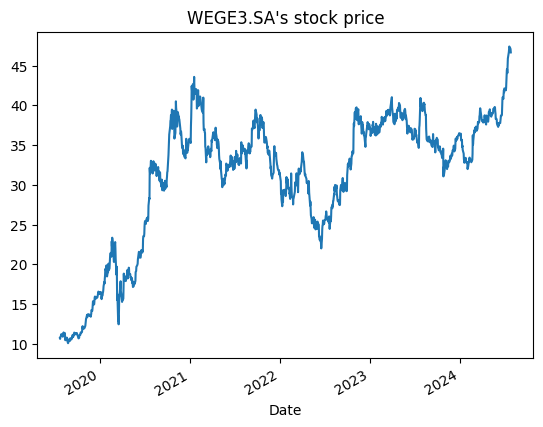

In [19]:
stock = yf.Ticker(tickers[0])
df = stock.history(period="5y")
df['Close'].plot(title="{}'s stock price".format(tickers[0]))

In [20]:
dir(stock)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fundamentals',
 '_get_ticker_tz',
 '_holders',
 '_isin',
 '_lazy_load_price_history',
 '_news',
 '_options2df',
 '_price_history',
 '_quote',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_target',
 'balance_sheet',
 'balancesheet',
 'basic_info',
 'calendar',
 'capital_gains',
 'cash_flow',
 'cashflow',
 'dividends',
 'earnings',
 'earnings_dates',
 'earnings_forecasts',
 'earnings_trend',
 'fast_info',
 'financials',
 'get_actions',
 'get

In [21]:
for k,v in stock.info.items():
    print (k, '\t', v, '\n')

address1 	 Avenida Prefeito Waldemar Grubba, 3300 

city 	 Jaraguá do Sul 

state 	 SC 

zip 	 89256-900 

country 	 Brazil 

phone 	 55 47 3276 4000 

website 	 https://www.weg.net/institutional/BR/en/ 

industry 	 Specialty Industrial Machinery 

industryKey 	 specialty-industrial-machinery 

industryDisp 	 Specialty Industrial Machinery 

sector 	 Industrials 

sectorKey 	 industrials 

sectorDisp 	 Industrials 

longBusinessSummary 	 WEG S.A. engages in the production and sale of capital goods in Brazil and internationally. The company offers electric motors, generators, and transformers; gear units and geared motors; hydraulic and steam turbines; frequency converters; motor starters and maneuver devices; control and protection of electric circuits for industrial automation; power sockets and switches; and electric traction solutions for heavy vehicles, SUV vehicles, locomotives, and sea transportation capital goods. It provides solutions for the generation of renewable and distrib

In [ ]:
stock.recommendations

In [ ]:
# stock.sustainability

In [ ]:
stock.actions

In [ ]:
stock.dividends

In [ ]:
stock.info

In [ ]:
stock.info['dividendYield']

In [ ]:
stock.info['beta']

In [22]:
list(map(lambda x: stock.info[x], 
         ['targetLowPrice', 'targetMeanPrice','targetMedianPrice','targetHighPrice']))

[34.0, 45.45, 47.0, 54.0]

In [ ]:
stock.info['industry']

In [ ]:
stock.major_holders

In [ ]:
stock.institutional_holders

In [ ]:

# Obter histórico de preços
hist = stock.history(period="5y")
hist.tail()

In [23]:
stock.get_cashflow()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
FreeCashFlow,"5,363,198,000.00","1,762,521,000.00","208,714,000.00","3,371,486,000.00",NaN
RepurchaseOfCapitalStock,"-40,396,000.00","-10,333,000.00",NaN,"-4,360,000.00",NaN
RepaymentOfDebt,"-3,534,389,000.00","-2,110,718,000.00","-241,149,000.00","-1,674,612,000.00",NaN
IssuanceOfDebt,"2,916,805,000.00","4,253,529,000.00","386,533,000.00","211,487,000.00",NaN
IssuanceOfCapitalStock,"3,149,000.00","2,813,000.00","4,563,000.00",NaN,"3,842,000.00"
CapitalExpenditure,"-1,658,625,000.00","-1,174,410,000.00","-847,344,000.00","-558,546,000.00",NaN
EndCashPosition,"6,488,454,000.00","4,451,002,000.00","2,714,427,000.00","3,892,140,000.00",NaN
BeginningCashPosition,"4,451,002,000.00","2,714,427,000.00","3,892,140,000.00","1,946,044,000.00",NaN
EffectOfExchangeRateChanges,"-306,714,000.00","-91,873,000.00","10,177,000.00","169,290,000.00",NaN
ChangesInCash,"2,344,166,000.00","1,828,448,000.00","-1,187,890,000.00","1,776,806,000.00",NaN


In [ ]:
pd.DataFrame(stock.calendar)


In [ ]:
financials = stock.financials

financials

In [ ]:
stock.cashflow

In [ ]:
stock.cash_flow

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd

def fetch_earnings_data(ticker):
    # Set up Selenium to run headlessly
    options = Options()
    options.headless = True
    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--window-size=1920x1080")

    driver = webdriver.Chrome(options=options)
    url = f"https://finance.yahoo.com/calendar/earnings?symbol={ticker}"
    driver.get(url)

    # Find the rows of the earnings table
    rows = driver.find_elements(By.CSS_SELECTOR, 'table tbody tr')

    data = []

    for row in rows:
        cols = row.find_elements(By.TAG_NAME, 'td')
        cols = [elem.text for elem in cols]
        data.append(cols)

    # Close the WebDriver
    driver.quit()

    # Assuming the data structure is as expected, create a DataFrame
    columns = ['Symbol', 'Company', 'Earnings Date', 'EPS Estimate', 'Reported EPS', 'Surprise(%)']
    df = pd.DataFrame(data, columns=columns)

    return df

# Example usage:
ticker = tickers[0]
earnings_data = fetch_earnings_data(ticker)

# Extract the time and timezone information into a new column
earnings_data['Earnings Time'] = earnings_data['Earnings Date']

earnings_data['EPS Estimate'] = earnings_data['EPS Estimate'].replace('+', '').replace('-', None).astype(float)
earnings_data['Reported EPS'] = earnings_data['Reported EPS'].replace('+', '').replace('-', None).astype(float)


# Extract just the date part from the "Earnings Date" column
earnings_data['Earnings Date'] = earnings_data['Earnings Date'].str.extract(r'(\b\w+ \d{1,2}, \d{4})')

# Convert string date to datetime
earnings_data['Earnings Date'] = pd.to_datetime(earnings_data['Earnings Date'])

earnings_data['Surprise(%)'] = earnings_data['Surprise(%)'].str.replace('+', '').replace('-', None).astype(float)

earnings_data

In [ ]:
earnings = earnings_data.dropna().sort_values(by='Earnings Date',ascending=False)

earnings

## P/L

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np



# Obtenha o preço de fechamento mais recente
latest_price = hist['Close'].iloc[-1]

# Obtenha o lucro por ação (Earnings Per Share - EPS)
# Aqui estamos assumindo que os dados de lucros (earnings) estão em milhares
eps = earnings['Reported EPS'].iloc[0]
print(f"Latest closing price per share for {ticker}: ${latest_price:.4f}")
print(f"Earnings per share (EPS) for {ticker}: ${eps:.2f}")



In [ ]:
# Calcule o P/L
pl_ratio = latest_price / eps

print(f"P/L ratio for {ticker}: {pl_ratio:.2f}")

In [ ]:
balance_sheet = stock.balance_sheet

balance_sheet

In [ ]:
closing_prices = hist['Close']
closing_prices

In [ ]:
balance_sheet.loc['Stockholders Equity', :]

In [ ]:
financials.loc['Net Income', :]

In [ ]:
financials.head()

In [ ]:
from datetime import datetime

dt = financials.columns[0]
dt = datetime.strftime(dt, "%Y-%m-%d")

dt

In [ ]:
type(dt)

In [ ]:
closing_prices = pd.DataFrame(hist['Close']).reset_index()

closing_prices['DateStr'] = pd.to_datetime(closing_prices['Date']).dt.date

closing_prices['Year'] = pd.to_datetime(closing_prices['Date']).dt.year


closing_prices.sort_values(by='Date', ascending=False, inplace=True)

closing_prices['Date'] = pd.to_datetime(closing_prices['DateStr'])

closing_prices.head()




In [ ]:
closing_prices.info()

In [ ]:
closing_prices.tail()

In [ ]:
last_prices = pd.DataFrame(closing_prices.groupby(by='Year')['Date'].max())
last_prices

In [ ]:
prices = pd.merge(closing_prices , last_prices).sort_values(by='Date',ascending=False)

In [ ]:
closing_price = closing_prices[(closing_prices['Date'] == '2023-12-28')]['Close']

In [ ]:
prices

In [ ]:
prices1 = prices.loc[1:]
prices1

In [ ]:

# Exemplo de cálculo de P/L com dados do Yahoo Finance
df_eps = pd.DataFrame(financials.loc['Net Income', :] / balance_sheet.loc['Stockholders Equity', :]).reset_index()

df_eps

In [ ]:
financials.loc['Basic EPS', :]

In [ ]:

df_eps.columns = ['Date','eps']



In [ ]:
df_eps['Year'] = pd.to_datetime(df_eps['Date']).dt.year

In [ ]:
df_eps

In [ ]:
type(df_eps)

In [ ]:
prices

In [ ]:
df_eps

In [ ]:
eps_prices = pd.merge(df_eps , prices, on='Year')
eps_prices

In [ ]:
prices

#balance_sheet

In [ ]:
df_pl_ratio = eps_prices.copy()
df_pl_ratio

In [ ]:
df_pl_ratio['pl_ratio'] = df_pl_ratio['Close']/df_pl_ratio['eps']

In [ ]:
df_pl_ratio

In [ ]:
prices/eps

In [ ]:
#
# stock.info


Calculando P/L (Preço/Lucro)
df['P/L'] = df['price_per_share'] / df['earnings_per_share']

Calculando P/VP (Preço/Valor Patrimonial)
df['P/VP'] = df['price_per_share'] / df['book_value_per_share']

Calculando P/S (Preço/Vendas)
df['P/S'] = df['price_per_share'] / df['sales_per_share']

Calculando PEG (Price to Earnings Growth)
df['PEG'] = df['P/L'] / df['growth_rate']

Calculando ROE (Retorno sobre o Patrimônio Líquido)
df['ROE'] = df['earnings_per_share'] / df['book_value_per_share']

